# Bước 1: Mô tả dữ liệu

## Mục tiêu: Miêu tả được dữ liệu như tỉ lệ %, max, min, vẽ được biểu đồ của các cột đơn

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
train_df = pd.read_csv("train.csv", index_col="PassengerId")

In [41]:
train_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [42]:
# Hiện 5 hàng đầu tiên
train_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Đưa ra thông tin của các hàng

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Ta thấy: thông tin bao gồm, tên cột, số lượng giá trị not null và kiểu giữ liệu

Vì những giá trị như Pclass, Sex, ... chỉ có 1 vài giá trị, vì vậy chúng ta nên chuyển nó sang dạng danh mục (category) thay vì để số.

In [44]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]


def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")


convert_cat(train_df, features)

In [45]:
# kiểm tra lại infor của train
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    category
 1   Name      891 non-null    object  
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    category
 5   Parch     891 non-null    category
 6   Ticket    891 non-null    object  
 7   Fare      891 non-null    float64 
 8   Cabin     204 non-null    object  
 9   Embarked  889 non-null    category
 10  Survived  891 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [46]:
# Miêu tả các giá trị số theo min, max, count, trung bình (mean), độ lệch chuẩn, ...
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [47]:
# Miêu tả các giá trị danh mục theo count, unique (giá trị khác nhau), top (giá trị nhiều nhất), freq (số lần xuất hiện)
train_df.describe(include=['category'])

,Pclass,Sex,SibSp,Parch,Embarked,Survived
count,891,891,891,891,889,891
unique,3,2,7,7,3,2
top,3,male,0,0,S,0
freq,491,577,608,678,644,549


In [48]:
# đếm các giá trị survived
train_df["Survived"].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [49]:
# tính tỉ lệ % survived

train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


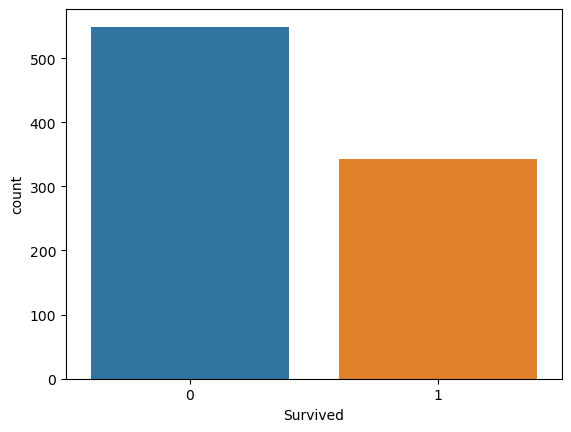

In [50]:
# Vẽ bểu đồ của survived
sns.countplot(data=train_df, x='Survived');

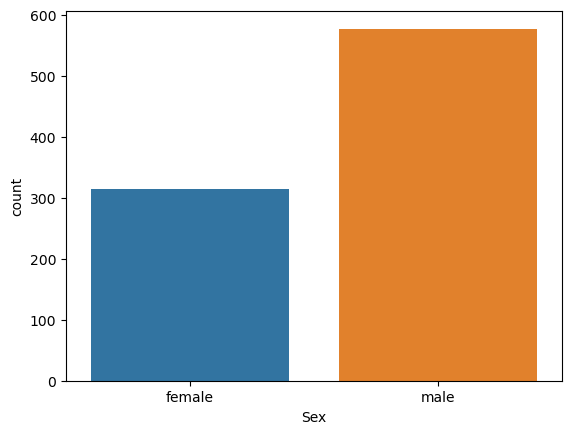

In [53]:
# tương tự, ta có biểu đồ với Pclass, Sex, SibSp, Parch, Embarked (những cột có kiểu danh mục)
sns.countplot(data=train_df, x='Sex');

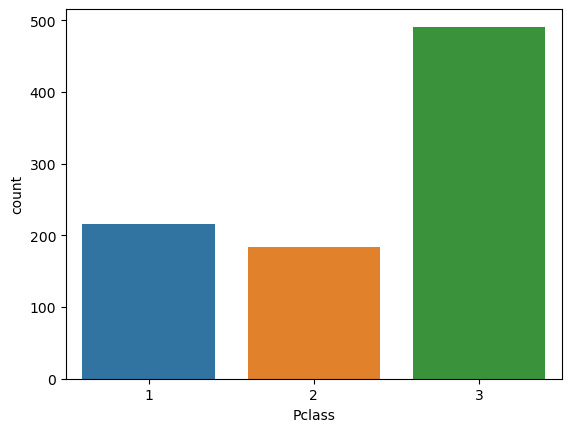

In [54]:
sns.countplot(data=train_df, x='Pclass');

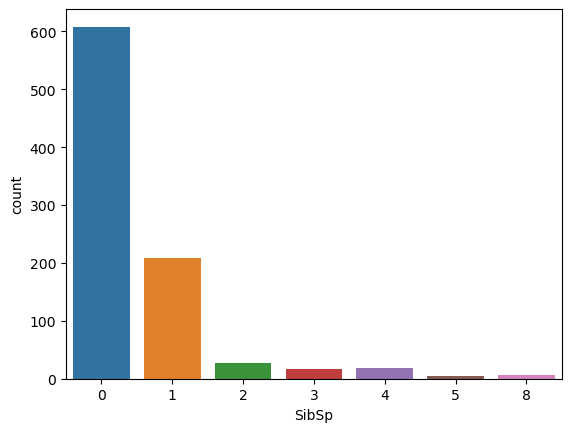

In [55]:
sns.countplot(data=train_df, x='SibSp');

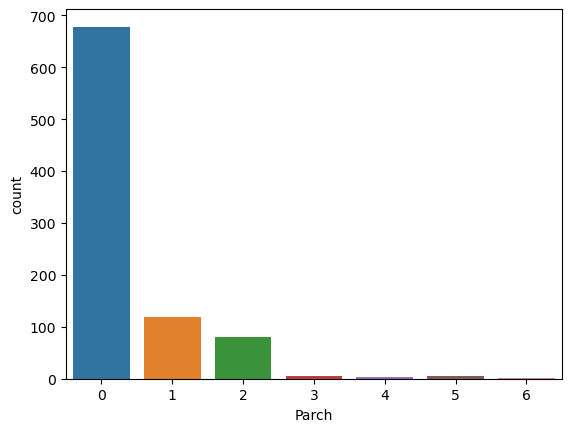

In [56]:
sns.countplot(data=train_df, x='Parch');

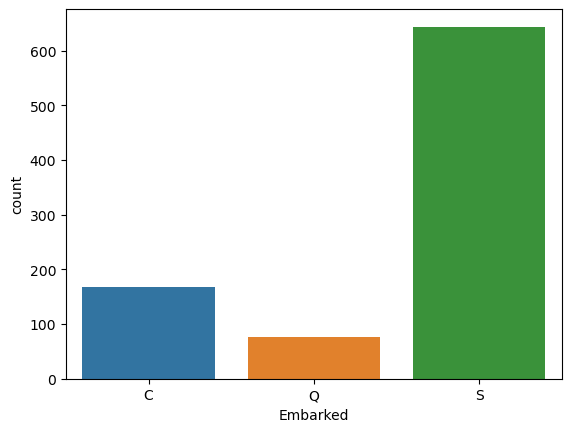

In [57]:
sns.countplot(data=train_df, x='Embarked');

## Với những giá trị số, biểu dồ vẽ như sau

<AxesSubplot:xlabel='Age', ylabel='Count'>

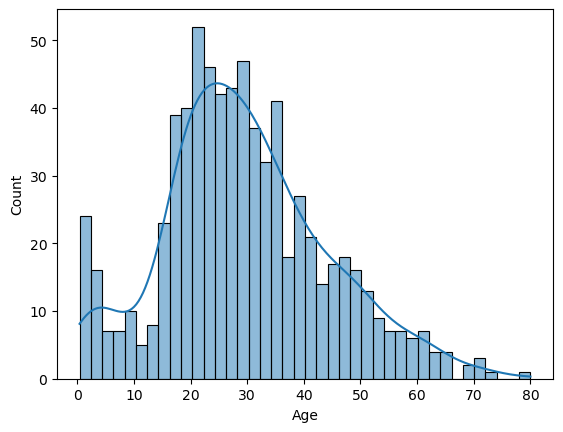

In [58]:
sns.histplot(data=train_df, x='Age', bins=40, kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

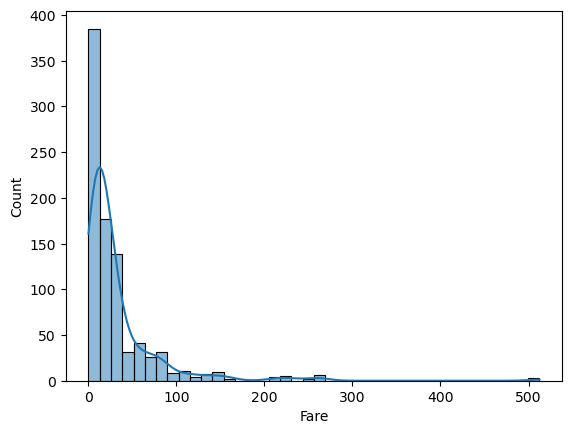

In [59]:
sns.histplot(data=train_df, x='Fare', bins=40, kde=True)